# Screen time & Steps: Is There a Relationship?
### Macy Ryan's CPSC 222, Fall 2020 Data Science Project

## Introduction

In this project I will be looking at the realtionship between number of steps taken in a day & hours of screen time spent on my smart phone. 

#### The Domain

The domain I will be working with in this projects is both a fitness domain and a technology domain. These domains are important to me because I think they both directly affect my wellbeing. I am constantly surronded by technology and know it effects different areas of my life. Furthermore, although I consider myslef a fairly active person, I want to see just how many steps I get everyday. I am researching the correspondence between number of steps taken in a day with the number of hours I am on my phone. 

#### The Dataset

The data set that I will be using is one that I have manually put together over the past 2-3 months. While it began as just 3 attributes, Date, Steps, and Screen time, I since added Hours spent on Zoom and the day of the week, making it 5 total attributes.

In [309]:
import pandas as pd
import numpy as np

# to begin our dataset analysis we must import the code 
personal_data = pd.read_csv("personal_data.csv", header=0) # read data from the csv file, set header to 0
# personal_data = personal_data.set_index("Date") # set the index to the Date attribute
print(personal_data) # print out the raw data

        Date  Steps  Screen Time (on phone) (hrs) Day of the week  \
0    9/18/20   4260                          5.00          Friday   
1    9/19/20  10120                          5.00        Saturday   
2    9/20/20   2901                          4.00          Sunday   
3    9/21/20  11984                          3.50          Monday   
4    9/22/20   1113                          4.00         Tuesday   
..       ...    ...                           ...             ...   
84  12/11/20    456                          5.00          Friday   
85  12/12/20    182                          1.15        Saturday   
86  12/13/20    105                          0.95          Sunday   
87  12/14/20   1060                          1.66          Monday   
88  12/15/20   2639                          1.00         Tuesday   

    Time Spent in Class (hrs) Quarantine Status  
0                         3.0                 N  
1                         0.0                 N  
2                    

#### Hypothesis 

My hypothesis is that the number of steps I take per day will have a negative correlation to the number of hours spent on my phone; meaning as the number of steps increases the number of hours will decrease and vise versa. 

#### Classification Task 

Using the various attributes I am going to try to classify the number of step I would take on a given day. I belive that the prediction would depend heavily on the day of the week and the sceen time. I anicipate it being challanging to use the day of the week in this classification because it is not numerical.

#### Findings

Based on the test conducted in the following notebook and code cell, I can not conclude that there is a correlation between steps taken per day and screentime spent on phone. There are factors that effect the number of steps I take per day, like day of the week (weekends have a higher mean steps than week days) and my quarantine status have more effect on steps than screentime. 

## Data Analysis

#### Details about the dataset 

The dataset I used in this project was manually compiled over 3 months. Using tracking functions on my phone I was able to know my steps per day and the screentime spent on my smartphone. In a csv file I then entered the date, day of the week, and number of hours in a class. Below is a brief overview of the statistics in the dataset to get an idea of the values I am working with. 

In [310]:
personal_data.describe()

,Steps,Screen Time (on phone) (hrs),Time Spent in Class (hrs)
count,89.000000,89.000000,89.000000
mean,4653.741573,3.665506,1.466292
std,3461.545397,1.359935,1.302964
min,69.000000,0.950000,0.000000
25%,2309.000000,2.710000,0.000000
50%,3723.000000,3.500000,1.500000
75%,6537.000000,4.500000,3.000000
max,14558.000000,7.400000,3.000000


#### Data Prep 

Because I manually entered the data into the table, there is no data prep or cleaning that needs to done. Once I get to the correlation section, I transform a few of the columns to numerical in order to help me find r. 

#### Exploratory Data Analysis

In order to explore this data and my hypothesis I am going to conduct a few different data aggregation techniques and also plot the data to visualize any correlations. In the following code cells I will explore the data and explain my findings along the way.  

The first thing I was to do is print a line chart of steps and screentime with date on the x-axis.

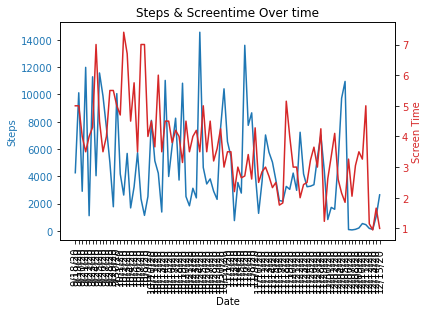

In [311]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots() 

'''
Here I am plotting the data on a line chart using two seperate y-axis
on one axis will be Steps, on the other Screentime, and the X-axis remains 
constant with Date.  
'''
color = 'tab:blue' # set color 
x = personal_data["Date"] # x-axis has date
y1 = personal_data["Steps"] # y-axis 1 has steps
y2 = personal_data["Screen Time (on phone) (hrs)"] # y-axis 2 has screentime
ax1.plot(x, y1) # plot the x an y axis
ax1.set_xlabel("Date") # set label
ax1.set_ylabel("Steps", color=color) # set label and color 
ax1.tick_params(axis='y', labelcolor=color) # set label color
ax1.tick_params(axis='x', rotation=90) # rotate the label on the x-axis

ax2 = ax1.twinx() # create a second chart that mirrors the first 

color = 'tab:red' # set color 
ax2.plot(x, y2, color=color) # plot the screen time 
ax2.set_ylabel("Screen Time", color=color) # set the label and color 
ax2.tick_params(axis='y', labelcolor=color) # set color

plt.title("Steps & Screentime Over time") # Set title
plt.savefig("LineGraph.pdf")
plt.show() # show the plot 

##### Line Graph Analysis

Looking at this line graph we can begin to see the corrilation between screen-time and number of steps taken each day. When the number of steps spikes we see the screen time dip and vise-versa. Using this we can assume that the number of hours spent looking at screen do impact the number of steps I took each day. However, this is not enough to fully come to that conclusion. My next step is looking at a few more charts and more testing. 

Now I want to use a bar chart to find on which days of the week I had the most screen time and which days of the week I had the most steps. 

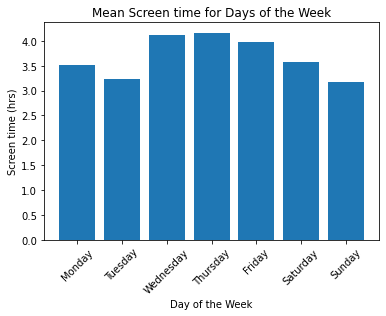

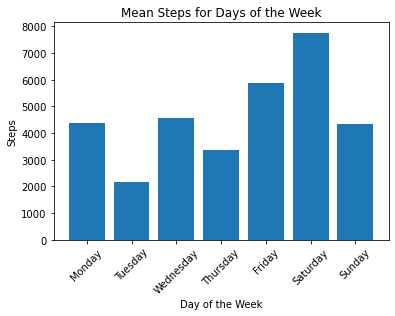

In [312]:
grouped_by_days = personal_data.groupby("Day of the week") # group the data by day of the week 
for group_name, group_df in grouped_by_days:
    if(group_name == "Monday"): # if the group name is Monday 
        mon_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Mondays 
        mon_steps_ser = group_df["Steps"] # create a series of Steps on Mondays
    elif(group_name == "Tuesday"): 
        tue_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Tuesdays
        tue_steps_ser = group_df["Steps"] # create a series of Steps on Tuesdays
    elif(group_name == "Wednesday"): 
        wed_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Wednesdays
        wed_steps_ser = group_df["Steps"] # create a series of Steps on Wednesdays
    elif(group_name == "Thursday"): 
        thu_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Thursdays
        thu_steps_ser = group_df["Steps"] # create a series of Steps on Thursdays
    elif(group_name == "Friday"): 
        fri_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Fridays
        fri_steps_ser = group_df["Steps"] # create a series of Steps on Fridays
    elif(group_name == "Saturday"): 
        sat_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Saturdays
        sat_steps_ser = group_df["Steps"] # create a series of Steps on Saturdays
    elif(group_name == "Sunday"): 
        sun_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Sundays
        sun_steps_ser = group_df["Steps"] # create a series of Steps on Sundays

# create a series of the weeks mean screentimes 
weekly_st_avg = [mon_st_ser.mean(), tue_st_ser.mean(), wed_st_ser.mean(), thu_st_ser.mean(), fri_st_ser.mean(), sat_st_ser.mean(), sun_st_ser.mean()]
# create a series with the weeks mean steps 
weekly_step_avg = [mon_steps_ser.mean(), tue_steps_ser.mean(), wed_steps_ser.mean(), thu_steps_ser.mean(), fri_steps_ser.mean(), sat_steps_ser.mean(), sun_steps_ser.mean()]
# create a series with the days of the week 
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure() # clear the last plot 
plt.bar(week_days, weekly_st_avg) # on a bar chart plot the days of the week & weekly screentime avg
plt.xlabel("Day of the Week") # label the x-axis
plt.ylabel("Screen time (hrs)") # label the y-axis 
plt.title("Mean Screen time for Days of the Week") # title the chart 
plt.tick_params(axis='x', rotation=45) # rotate the x-axis labels
plt.savefig("DayVScreenTime.pdf") # save graph
plt.show() # show the chart 

plt.figure() # clear the previous chart 
plt.bar(week_days, weekly_step_avg) # plot the days of the week vs. weekly step avg
plt.xlabel("Day of the Week") # label the x-axis
plt.ylabel("Steps") # label the y-axis 
plt.title("Mean Steps for Days of the Week") # title the chart 
plt.tick_params(axis='x', rotation=45) # rotate the x-axis labels 
plt.savefig("DayVSteps.pdf") # save graph
plt.show() # show the chart 

##### Bar Graph Analysis

It is clear that on certain days I spend dramatically less time walking and some days I spend more time walking. Take Tuesday and Saturday, on Tuesday, on average, I spend between 3 and 3.5 hours on my phone and walked, on average, only 2000 steps a day. However on Saturdays, I averaged above 8000 steps and spents 4 hours on my phone, on average. Given this data it could be argued that there isn't much corrilation between steps and screen time.  

Now I want to order the dataset by screen time from smallest to largest and then plot that with the corresponding steps and date. By doing this I hope to be able to see the negative correlation, as one goes up the other goes down. 

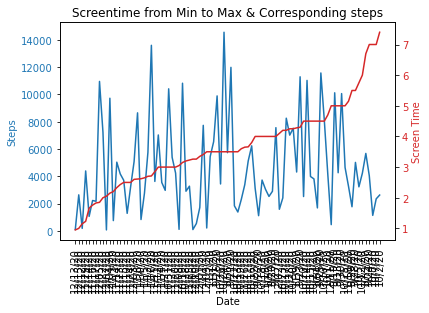

In [313]:
df = personal_data # creating a copy of the dataset 
df = df.sort_values('Screen Time (on phone) (hrs)') # sorting by ascending value

fig, ax1 = plt.subplots() 

color = 'tab:blue'
x = df["Date"] # x-axis has date
y1 = df["Steps"] # y-axis 1 has steps
y2 = df["Screen Time (on phone) (hrs)"] # y-axis 2 has screentime
ax1.plot(x, y1) # plot the x an y axis
ax1.set_xlabel("Date") # set label
ax1.set_ylabel("Steps", color=color) # set label and color 
ax1.tick_params(axis='y', labelcolor=color) # set label color
ax1.tick_params(axis='x', rotation=90) # rotate the label on the x-axis

ax2 = ax1.twinx() # create a second chart that mirrors the first 

color = 'tab:red' # set color 
ax2.plot(x, y2, color=color) # plot the screen time 
ax2.set_ylabel("Screen Time", color=color) # set the label and color 
ax2.tick_params(axis='y', labelcolor=color) # set color

plt.title("Screentime from Min to Max & Corresponding steps") # Set title
plt.savefig("LineGraph2.pdf") # save the graph 
plt.show() # show the plot 

##### Line Graph Analysis

I was hoping that by arranging the dataset in ascending order in terms of screentime, and by plotting it, we would see that as screentime increases, steps would decrease. However, once I plotted the data it is clear that there is very little correlation between steps and screentime. 

#### Hypothesis Testing 

The only thing we can truly conclude from the previous graphs is that they are not an adequate measure for testing whether or not there is a corrilation between steps and screen time. In order to really test whether or not there is a relationship between the two we need to conduct some hypothesis testing. I am going to do four seperate hypothesis tests. 

1. I want to test whether the mean screen time on days I walked more than 4000 steps is less than the mean screen time on days I walk less than 4000 steps. 
2. I want to test whether I get on average more steps on the weekdays or on weekends. 
3. I want to test whether I get less steps on days with more than 3 hrs in class. 
4. I want to test if the mean steps is more while not in quarantine than the mean steps in quarantine. 
*******
**Hypothesis Test #1** I want to test whether the mean screen time on days I walked more than 4000 steps is less than the mean screen time on days I walk less than 4000 steps.

In [314]:
'''Here I am going to make a series of the screen time on days where 
I take more than 4000 steps per day and another series for when I take
less than 4000 steps a day. Using these series I will be able to test whether
the mean screen time is higher on days I walk less.'''
steps_on_4000_plus = personal_data.loc[personal_data['Steps'] >= 4000] # Seperate the data by numer of steps
st_on_4000_plus = steps_on_4000_plus["Screen Time (on phone) (hrs)"] # create series of screen time
steps_on_4000_less = personal_data.loc[personal_data['Steps'] < 4000] # Seperate the data by numer of steps
st_on_4000_less = steps_on_4000_less["Screen Time (on phone) (hrs)"] # create series of screen time

##### **Select the Null and Alternative Hypothesis**

$$H_0: \mu_1 > \mu_2$$

$$H_1: \mu_1 \leq \mu_2$$  

*1: Screen time on days with more than 4000 steps*  
*2: Screen time on days with less than 4000 steps*

We will reject $H_0$ if the mean screen time on days with 4000+ steps is less than the mean screen time on days with 4000- steps. 

##### **Select the Level of Significance**

The level of significance I will be using is 0.05. 

$$\alpha = 0.05$$

##### **Find the appropriate test statistic** 

The test statistic will help us decide whether to accept or reject $H_0$. The formula used to find the test statistic is:  $$t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{{S_p}^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$  

##### **Formulate the Decision Rule**

Reject $H_0$ if t is $> 1.671$

##### **Calculate**

Below we will calculate t. 

In [315]:
import scipy.stats as stats 

t_computed, p_val = stats.ttest_ind(st_on_4000_plus, st_on_4000_less)
print(t_computed, p_val / 2)  

0.6784703775198262 0.2496371202134191


##### **Conclusion**

Because t computed was 0.6784, which is less than 1.671, we will reject $H_0$. I can conclude that the mean sceentime on days with more than 4000 steps is NOT less than the mean screentime on days with less than 4000 steps. 
*****

**Hypothesis Test #2:** I want to test whether I get on average more steps on the weekdays or on weekends. 

In [316]:
'''Here I am seperating the data by day of the week and creating two seperate datasets. One
of the datasets has all of the data from Monday-Friday, and the other is all of the data 
from Saturday and Sunday'''
weekdays_df = personal_data.loc[personal_data['Day of the week'] == "Monday"]
weekdays_df = weekdays_df.append(personal_data.loc[personal_data['Day of the week'] == "Tuesday"])
weekdays_df = weekdays_df.append(personal_data.loc[personal_data['Day of the week'] == "Wednesday"])
weekdays_df = weekdays_df.append(personal_data.loc[personal_data['Day of the week'] == "Thursday"])
weekdays_df = weekdays_df.append(personal_data.loc[personal_data['Day of the week'] == "Friday"])
weekends_df = personal_data.loc[personal_data['Day of the week'] == "Saturday"]
weekends_df = weekends_df.append(personal_data.loc[personal_data['Day of the week'] == "Sunday"])

weekday_steps = weekdays_df["Steps"] # create a series with just the number of steps taken on weekdays
weekend_steps = weekends_df["Steps"] # creat a series with just the number of steps taken on weekends 

##### **Select the Null and Alternative Hypothesis**

$$H_0: \mu_1 > \mu_2$$

$$H_1: \mu_1 \leq \mu_2$$  

*1: Weekday steps*  
*2: Weekend steps*

We will reject $H_0$ if the mean steps on weekdays is less than the mean steps on weekends. 

##### **Select the Level of Significance**

The level of significance I will be using is 0.05. 

$$\alpha = 0.05$$

##### **Find the appropriate test statistic** 

The test statistic will help us decide whether to accept or reject $H_0$. The formula used to find the test statistic is:  $$t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{{S_p}^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$  

##### **Formulate the Decision Rule**

Reject $H_0$ if t is $> 1.671$

##### **Calculate**

Below we will calculate t. 

In [317]:
t_computed, p_val = stats.ttest_ind(weekend_steps, weekday_steps)
print(t_computed, p_val / 2)  

2.514755025968796 0.0068751014713008644


##### **Conclusion**

Because t computed was 2.514, which is more than 1.671, we will reject $H_0$. I can conclude that the mean steps on weekdays is NOT more than the mean steps on weekends. Below we can clearly see that I took on average 2000 more steps on the weekend than on weekdays. 

In [318]:
print("Weekday average steps:", weekday_steps.mean())
print("Weekend average steps:", weekend_steps.mean())

Weekday average steps: 4078.126984126984
Weekend average steps: 6048.5


****
**Hypothesis Test #3:** I want to test whether I get less steps on days with more than 3 hrs in class. 

In [319]:
heavy_class_days = personal_data.loc[personal_data['Time Spent in Class (hrs)'] >= 3]
light_class_days = personal_data.loc[personal_data['Time Spent in Class (hrs)'] < 3]

steps_heavy_class_days = heavy_class_days["Steps"]
steps_light_class_days = light_class_days["Steps"]

##### **Select the Null and Alternative Hypothesis**

$$H_0: \mu_1 > \mu_2$$

$$H_1: \mu_1 \leq \mu_2$$  

*1: Heavy Class days steps*  
*2: Light Class days steps*

We will reject $H_0$ if the mean steps on light class days is more than the mean steps on heavy class days. 

##### **Select the Level of Significance**

The level of significance I will be using is 0.05. 

$$\alpha = 0.05$$

##### **Find the appropriate test statistic** 

The test statistic will help us decide whether to accept or reject $H_0$. The formula used to find the test statistic is:  $$t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{{S_p}^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$  

##### **Formulate the Decision Rule**

Reject $H_0$ if t is $> 1.671$

##### **Calculate**

Below we will calculate t. 

In [320]:
t_computed, p_val = stats.ttest_ind(steps_heavy_class_days, steps_light_class_days)
print(t_computed, p_val / 2)  

0.8439715667019034 0.20049998962081061


##### **Conclusion**

Because t computed was 0.84397, which is less than 1.671, we will not reject $H_0$. I can conclude that the mean steps on days with heavy class time (> 3 hrs) is more than the mean steps on days with light class time (< 3 hrs).
****

**Hypothesis Test #4:** Is the mean number of steps greater while outside of quarantine or in quarantine? 

In [321]:
in_quarantine = personal_data.loc[personal_data['Quarantine Status'] == "Y"]
out_quarantine = personal_data.loc[personal_data['Quarantine Status'] == "N"]

in_quarantine_steps = in_quarantine["Steps"]
out_quarantine_steps = out_quarantine["Steps"]

##### **Select the Null and Alternative Hypothesis**

$$H_0: \mu_1 > \mu_2$$

$$H_1: \mu_1 \leq \mu_2$$  

*1: Out of quarantine steps*  
*2: In quarantine steps*

We will reject $H_0$ if the mean steps on quarantine days is more than the mean steps on out of quarantine days. 

##### **Select the Level of Significance**

The level of significance I will be using is 0.05. 

$$\alpha = 0.05$$

##### **Find the appropriate test statistic** 

The test statistic will help us decide whether to accept or reject $H_0$. The formula used to find the test statistic is:  $$t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{{S_p}^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$  

##### **Formulate the Decision Rule**

Reject $H_0$ if t is $> 1.671$

##### **Calculate**

Below we will calculate t. 

In [322]:
t_computed, p_val = stats.ttest_ind(in_quarantine_steps, out_quarantine_steps)
print(t_computed, p_val / 2)  

-4.3697598555642525 1.730647697599168e-05


##### **Conclusion**

Because t computed was -4.37, which is less than 1.671, we will not reject $H_0$. I can conclude that the mean steps on out of quarantine days is more than the mean steps on quarantine days. Below I will display the mean of each which will clearly show that this is true. 

In [323]:
print("Mean Steps when not in quarantine:", out_quarantine_steps.mean())
print("Mean Steps when in quarantine:", in_quarantine_steps.mean())

Mean Steps when not in quarantine: 5173.683544303797
Mean Steps when in quarantine: 313.6666666666667


### Finding Correlation (r)

I want to find the correlation between certain attributes in the dataset. To do this I am foing to use the stats library. The closer r is to 0.0, the smaller the correlation, as r gets closer to 1.0 or -1.0, the stronger the correlation.

In [324]:
'''Finding the correlation between steps and screentime'''
m, b, r, p_value, std_err = stats.linregress(personal_data["Steps"], personal_data["Screen Time (on phone) (hrs)"])
print("r between steps & screentime:", r)

r between steps & screentime: 0.0414317663598124


There is a very very small correlation between steps and screentime, not enough to conclude that they are related in anyway. 

In [349]:
'''Finding the correlation between steps and quarantine status'''
from sklearn.preprocessing import LabelEncoder

# Use a label encoder to transform the Quarantine status column to int 
le = LabelEncoder() 
personal_data['Quarantine Status'] = le.fit_transform(personal_data['Quarantine Status'])

m, b, r, p_value, std_err = stats.linregress(personal_data["Steps"], personal_data["Quarantine Status"])
print("r between steps and quarantine status:", r)

r between steps and quarantine status: -0.4299617289352839


There is a moderate negative correlation between steps and quarantine status. 

In [328]:
'''Finding correlation between day of the week and steps'''
le = LabelEncoder() 
day_of_the_week = personal_data['Day of the week'] # make a copy of the day of the week column 
day_of_the_week = le.fit_transform(day_of_the_week) # transform to int 

m, b, r, p_value, std_err = stats.linregress(personal_data["Steps"], day_of_the_week)
print("r between steps and day of the week:", r)

r between steps and quarantine status: -0.26672832082970493


There is a slighly moderate negative correlation between steps and day of the week. 

## Classification 

For this part of the project, I am looking to predict the day of the week based on the atrributes steps, screentime, and time spent in class. To test this I am going to use two different classifiers, kNN hold out method and a decision tree classifier. 

#### kNN Classifier
For the kNN hold out classifier I used a combination of test size equal to .25 and n neighbors equal to 3, which gave me the highest accuracy of .34. Other testing gave me the following results:  
`test_size = .2, n_neighbors = 1, accuracy = .22`  
`test_size = .2, n_neighbors = 2, accuracy = .27`  
`test_size = .2, n_neighbors = 3, accuracy = .33`  
`test_size = .3, n_neighbors = 1, accuracy = .30`  
`test_size = .3, n_neighbors = 2, accuracy = .30`  
`test_size = .3, n_neighbors = 3, accuracy = .11`  
`test_size = .25, n_neighbors = 1, accuracy = .22`  
`test_size = .25, n_neighbors = 2, accuracy = .26`  
Unfortunatly, the classifier is only 34% accurate because the attributes used are not a good measure for day of the week. There is obviously a lack of correlation between steps, screentime, class hours, and day of the week. In order to test my classifier and have better predictions, I also used a decision tree classifier.

In [346]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

x_train = personal_data.drop(["Day of the week", "Quarantine Status", "Date"], axis=1) # drop unnecessary data
y_train = personal_data["Day of the week"] # column we are predicting

# scale the instances so nothing is weighted more than others 
scaler = MinMaxScaler() 
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)

# use random_state for reproducibility
# use stratify to ensure a similar distribution of class labels in training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0, stratify=y_train, test_size=0.25)

clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
clf.fit(x_train, y_train)

y_predicted = clf.predict(x_test) # predict the day of the week based on testing set 
print(y_predicted)

accuracy = clf.score(x_test, y_test) # find the accuracy of the classifier
print(accuracy)

['Friday' 'Saturday' 'Friday' 'Thursday' 'Friday' 'Saturday' 'Monday'
 'Saturday' 'Wednesday' 'Friday' 'Sunday' 'Thursday' 'Sunday' 'Monday'
 'Saturday' 'Friday' 'Friday' 'Saturday' 'Friday' 'Friday' 'Friday'
 'Friday' 'Friday']
0.34782608695652173


#### Decision Tree Classifier

Using a decision tree classifier I was able to increase my accuracy to .5217, which is not great but better than the kNN classifier. To get this accuracy I tried using various max depths, testing the max depths gave me the following results: 
`max_depth = 1, accuracy = .26`  
`max_depth = 2, accuracy = .26`  
`max_depth = 4, accuracy = .43`  
`max_depth = 5, accuracy = .52`  
`max_depth = 6, accuracy = .43`  
`no max_depth, accuracy = .39`  
The final accuracy was 52.17%. For the same reasons as the kNN classifer, the accuracy can't get much better than that because the attributes are not highly correlated with one another. 

In [347]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state = 0) # create the decision tree 
tree_clf.fit(x_train, y_train)

y_predicted = tree_clf.predict(x_test) # find the predictions according to the decision tree
print(y_predicted)

accuracy = tree_clf.score(x_test, y_test) # find the accuracy of the decision tree
print(accuracy)

['Friday' 'Saturday' 'Friday' 'Monday' 'Tuesday' 'Saturday' 'Sunday'
 'Friday' 'Tuesday' 'Sunday' 'Sunday' 'Thursday' 'Tuesday' 'Thursday'
 'Tuesday' 'Saturday' 'Monday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday'
 'Sunday' 'Sunday']
0.5217391304347826


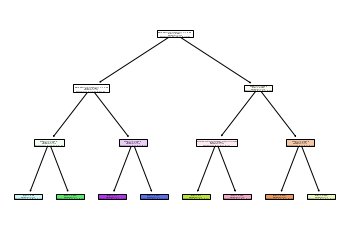

In [348]:
fig = plt.figure() # creat a figure
tree.plot_tree(tree_clf, feature_names=x_train.columns, filled=True) # plot the decision tree 
fig.savefig("decision_tree.pdf") # save the decision tree to a file 

#### Results

By evaluating two different methods for classifiers, I found that the decision tree gave me the most accurate results. By manipulating both classifiers I was able to improve both accuracy rates, however neither improved drastically with the best accuracy being 54.17% on the decision tree and 34.78% on the kNN classifier. 

## Conclusion

When starting this project I was very interested to see if steps per day and screentime per day were effected by one another. I was almost certain that they would be, as most of the time that I spent on my phone I am sitting or laying down. However, at the end of this project I can conclude that my hypothesis was wrong and there isn't a strong enough correlation between steps and screen time to say that one effects the other. 

There may be other factors the effect steps, like day of the week and quarantine status, which both have moderate correlations to steps; however, I could not find any data that would strongly effect the number of steps I took in a day. In the future I might try testing weather which could have a stronger effect than any of the attributes I was testing. Furthermore, the data in of itself might not be the most accurate. Screentime does not include time I spend on my computer, which is significant as I do most of my school work and watch entertainment on my computer. On top of that, the steps count might now be entirely accurate because I do not always keep my phone on me at all times, throughout the duration of this project I tried my best to keep it with me but there were certainly time when I was walking around that I did not have it. In the future this project could be more accurate if I tracked screentime on my computer as well and wore a steps counting device like an apple watch or fitbit at all times. 

During the classification process I initially thought that the hold-out method would be the most accurate, but it because clear that the decision tree was better at predicting the day of the week. After testing different test sizes, number of neighbors, and max depths, I was able to improve upon the accuracy score but not significantly. I think that the classifiers could be improved if I was able to include the date in the classification instead of dropping it at the beginning. I also think the accuracy would improve if I improved the way I collected the data to begin with. 

When I initially began this project, it was difficult for me to think of who might be interested in the data. However, I think this data could be benificial for students because you can see how your habits might be effected by the time you spend on your smartphone or in class, especially now that classes are majority online. This data can also be harmful if companies, especially social media companies, can keep users attached to their phones or computers and spend less time getting the steps they need to lead a healthy lifestyle. 
